# Ch03 K-평균 군집화

군집분석 또는 군집화는 유사한 개체들을 그룹화하는 작업이다.  
개체들을 군집화 하는 방법중 개체들 간 속성이 비슷한 것 끼리 K개의 그룹을 만드는 방법을 `K-평균 군집화`라고 한다.  
K-평균군집화는 비지도학습에 의한 군집화 방법이다.

## K-평균 군집화의 원리

`군집`은 유사성이 높은 개체들을 묶은 것이다.  
`유사도`는 군집 중심들과 각 개체간 유클리드 거리로 측정한다.  
개체와 개체가 속한 군집의 군집 중심사이의 유클리드 거리의 제곱을 `WSS(within-cluster sum of squares)`라고 한다.  
이때 군집에 속하는 모든 개체의 WSS를 더한 값을 `TWSS(Total WSS)`라고 한다.  
군집화는 정해진 군집의 수 안에서 TWSS를 최소화 되는 방향으로 진행된다.  
개체의 수 만큼 군집이 있다면 TWSS는 0이다.  
군집 수(K)는 데이터의 분포에 따라 달라질 수 있는데 `elbow method`는 K정하는 방법중 하나다.

## Python 예시 1


### 패키지 설정
`sklearn.cluster.KMeans`: K-평균 군집화 모듈  
`sklearn.preprocessing.StandardScaler`: 표준화 모듈  
`numpy`: 행렬연산 패키지  
`pandas`: 데이터 프레임 패키지  
`matplotlib.pyplot`: 데이터 시각화 패키지  

In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 데이터 리스트: X, Y
data = np.array([
    [45,3],
    [9,12],
    [15,10],
    [60,5],
    [21,15],
])
data

array([[45,  3],
       [ 9, 12],
       [15, 10],
       [60,  5],
       [21, 15]])

### 원데이터 분석
데이터 전처리 전 원데이터 분포파악

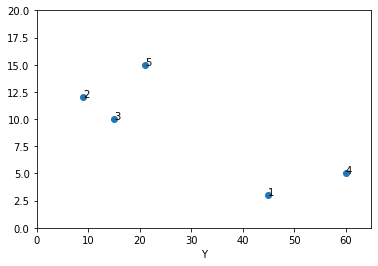

In [ ]:
# 원데이터의 X, Y 산포도
plt.scatter(data[:,0],data[:,1])
plt.xlabel('X')
plt.xlabel('Y')
plt.xlim(0, 65)
plt.ylim(0, 20)

# 데이터의 행,열 수
rows, columns = data.shape
# 데이터 라벨링
for i in range(rows):
  plt.annotate(i + 1, (data[i,0],data[i,1]))

### 피처 스케일링

X, Y값을 표준화한다. StandatdScaler 모듈은 모표준편차를 사용한다. numpy를 이용해 직접 표준편차를 계산할 경우 자유도를 고려할 수 있다.
```python
# 모표준편차를 이용한 표준화
data_std = (data - data.mean(axis=0)) / data.std(ddof=0,axis=0)
# 표본표준편차를 이용한 표준화
data_std = (data - data.mean(axis=0)) / data.std(ddof=1,axis=0)
```


In [ ]:
scaler = StandardScaler()
data_std = scaler.fit_transform(data)
print(data_std)

[[ 0.77521709 -1.35526185]
 [-1.08530393  0.67763093]
 [-0.77521709  0.22587698]
 [ 1.55043418 -0.9035079 ]
 [-0.46513025  1.35526185]]


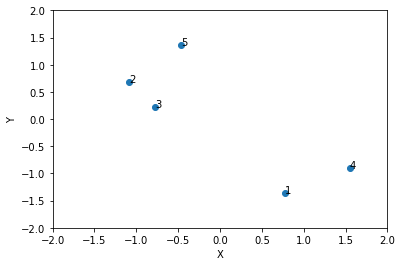

In [ ]:
# 표준화된 데이터의 X, Y의 산포도
plt.scatter(data_std[:,0],data_std[:,1])
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-2,2)
plt.ylim(-2,2)

# 행, 열 수
rows, columns = data_std.shape
for i in range(rows):
  plt.annotate(i+1,(data_std[i,0],data_std[i,1]))

### 군집화

[KMeans 모듈](https://scikit-learn.org/stable/modules/clustering.html#k-means)을 사용해 군집화한다.   
KMeans class Docs: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.fit

<br/>

#### KMeans 주요 프로퍼티  

`cluster_centers_`: 각 군집 중심의 좌표 리스트  
`labels_`: 각 개체별 속하는 군집의 라벨  
`inertia_`: TWSS


In [ ]:
# 군집의 수를 2로하는 군집화 객체 생성
kmeans = KMeans(n_clusters=2)
# 2,3열을 이용한 군집화
kmeans.fit(data_std)
# 군집 라벨
print(kmeans.labels_)
# 군집별 군집 중심
print(kmeans.cluster_centers_)

[1 0 0 1 0]
[[-0.77521709  0.75292325]
 [ 1.16282564 -1.12938488]]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### 결과 분석

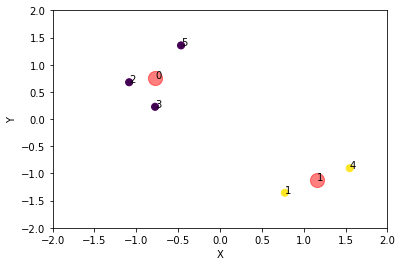

In [ ]:
# 군집 데이터 분포
plt.scatter(data_std[:,0],data_std[:,1], c=kmeans.labels_, s=50)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-2,2)
plt.ylim(-2,2)

# 행과 열의 수
rows, columns = data_std.shape
# 데이터 라벨
for i in range(rows):
  plt.annotate(i+1,(data_std[i,0],data_std[i,1]))
# 군집 중심 표기
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            c='red', s=200, alpha=0.5)

# 군집 라벨
for k in range(0,len(kmeans.cluster_centers_)):  
  plt.annotate(k,(kmeans.cluster_centers_[k,0],kmeans.cluster_centers_[k,1]))

군집수에 따른 TWSS의 변화를 그래프로 출력해 `elbow method`로 적당한 군집의 수를 알아보면, 군집의 수가 2에서 3으로 갈 때 기울기의 변화가 급격히 줄어들기 때문에 군집의 수는 2가 적당하다고 할 수 있다.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

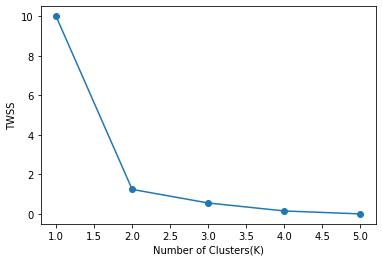

In [ ]:
# 군집수 별 TWSS값
TWSS = {}
# 군집 수 1~5 일때 TWSS 계산
for k in range(1,6):
  model=KMeans(n_clusters=k) # 군집 수 설정
  model.fit(data_std) # 군집화
  TWSS[k] = model.inertia_ # 군집 수 별 TWSS값 

# 군집수에 따른 TWSS 그래프
# print(TWSS.items())

plt.plot(TWSS.keys(),TWSS.values(),marker = 'o')
plt.xlabel("Number of Clusters(K)")
plt.ylabel("TWSS")
plt.show()

### 추가 활동

위 예시에 추가적으로 데이터를 추가 한 후 K의 변화에 따른 군집을 플로팅해보자

#### 데이터 추가

In [11]:
# 데이터 추가
data = np.array([
    [45,3],
    [9,12],
    [15,10],
    [60,5],
    [21,15],
    [60,20],
    [50,20],
    [58,30],
    [56,4],
])
data

array([[45,  3],
       [ 9, 12],
       [15, 10],
       [60,  5],
       [21, 15],
       [60, 20],
       [50, 20],
       [58, 30],
       [56,  4]])

#### 원데이터 분석

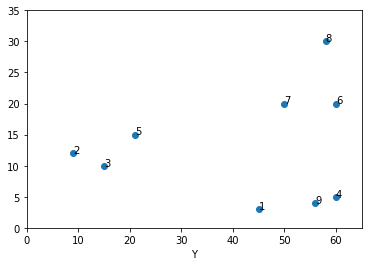

In [30]:
# 원데이터의 X, Y 산포도
plt.scatter(data[:,0],data[:,1])
plt.xlabel('X')
plt.xlabel('Y')
plt.xlim(0, 65)
plt.ylim(0, 35)

# 데이터의 행,열 수
rows, columns = data.shape
# 데이터 라벨링
for i in range(rows):
  plt.annotate(i + 1, (data[i,0],data[i,1]))

#### 피처 스케일링

In [31]:
scaler = StandardScaler()
data_std = scaler.fit_transform(data)
print(data_std)

[[ 0.17643279 -1.20697913]
 [-1.66757447 -0.14431272]
 [-1.36023993 -0.38046081]
 [ 0.94476915 -0.97083104]
 [-1.05290538  0.20990941]
 [ 0.94476915  0.80027964]
 [ 0.43254491  0.80027964]
 [ 0.84232431  1.9810201 ]
 [ 0.73987946 -1.08890509]]


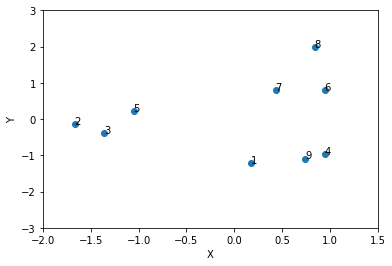

In [32]:
# 표준화된 데이터의 X, Y의 산포도
plt.scatter(data_std[:,0],data_std[:,1])
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-2,1.5)
plt.ylim(-3,3)

# 행, 열 수
rows, columns = data_std.shape
for i in range(rows):
  plt.annotate(i+1,(data_std[i,0],data_std[i,1]))

#### 군집화

`elbow method`를 이용해 새로운 데이터의 적절한 K값을 찾아보면, K는 3이 적정해 보인다.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

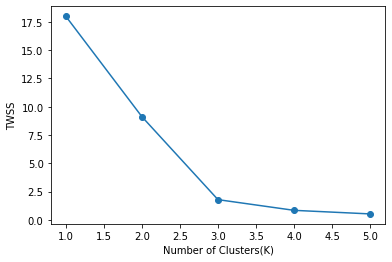

In [33]:
# 군집수 별 TWSS값
TWSS = {}
# 군집 수 1~5 일때 TWSS 계산
for k in range(1,6):
  model=KMeans(n_clusters=k) # 군집 수 설정
  model.fit(data_std) # 군집화
  TWSS[k] = model.inertia_ # 군집 수 별 TWSS값 

# 군집수에 따른 TWSS 그래프
# print(TWSS.items())

plt.plot(TWSS.keys(),TWSS.values(),marker = 'o')
plt.xlabel("Number of Clusters(K)")
plt.ylabel("TWSS")
plt.show()

In [38]:
# 위 결과에의해 군집의 수는 3
K = 3
# 군집의 수를 2로하는 군집화 객체 생성
kmeans = KMeans(n_clusters=K)
# 2,3열을 이용한 군집화
kmeans.fit(data_std)
# 군집 라벨
print(kmeans.labels_)
# 군집별 군집 중심
print(kmeans.cluster_centers_)

[2 0 0 2 0 1 1 1 2]
[[-1.36023993 -0.10495471]
 [ 0.73987946  1.19385979]
 [ 0.62036047 -1.08890509]]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### 결과 분석

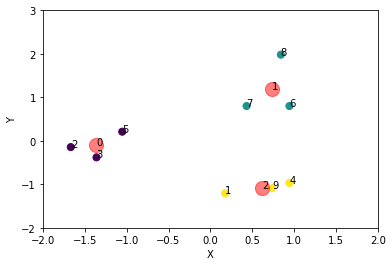

In [39]:
# 군집 데이터 분포
plt.scatter(data_std[:,0],data_std[:,1], c=kmeans.labels_, s=50)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-2,2)
plt.ylim(-2,3)

# 행과 열의 수
rows, columns = data_std.shape
# 데이터 라벨
for i in range(rows):
  plt.annotate(i+1,(data_std[i,0],data_std[i,1]))
# 군집 중심 표기
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            c='red', s=200, alpha=0.5)

# 군집 라벨
for k in range(0,len(kmeans.cluster_centers_)):  
  plt.annotate(k,(kmeans.cluster_centers_[k,0],kmeans.cluster_centers_[k,1]))

## Python 예시 2 (붓꽃의 군집화)

iris 데이터셋을 군집화 하고 이를 실제 붓꽃의 종과 비교해보자.

In [19]:
# 군집의 수를 2로하는 군집화 객체 생성
kmeans = KMeans(n_clusters=2)
# 2,3열을 이용한 군집화
kmeans.fit(data_std)
# 군집 라벨
print(kmeans.labels_)
# 군집별 군집 중심
print(kmeans.cluster_centers_)

[1 1 1 1 1 0 0 0 1]
[[ 0.73987946  1.19385979]
 [-0.36993973 -0.5969299 ]]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### 패키지 설정

`sklearn`의 `KMeans`, `StandardScaler`모듈과 `numpy`, `matplotlib`패키지는 위 예시1에서 이미 불러왔기 때문에 생략하고 
`sklean`패키지의 `datasets`, `metrics.confusion_matric`, `metrics.accuracy_score` 모듈을 불러온다.

#### 혼돈행렬(confusion matrix)

모델, 알고이즘의 결과를 분석하기 위해 사용되는 행렬로 오류행랼(error matrix)라고도 한다.
혼돈 행렬을 이용하여 정확도(accuracy), 정밀도(precision), 민감도(=재현율, recall, sensitivity), 특이도(Specifficity)를 계산할 수 있다. 값은 TP, TN, FP, FN 4개를 가지며 앞은 예측이 맞았는지 True/False 뒤는 예측결과 Positive/Negative를 나타낸다. 즉 P로 예측했지만 틀린 경우는 NP, N으로 예측했지만 맞은경우는 TN이다.

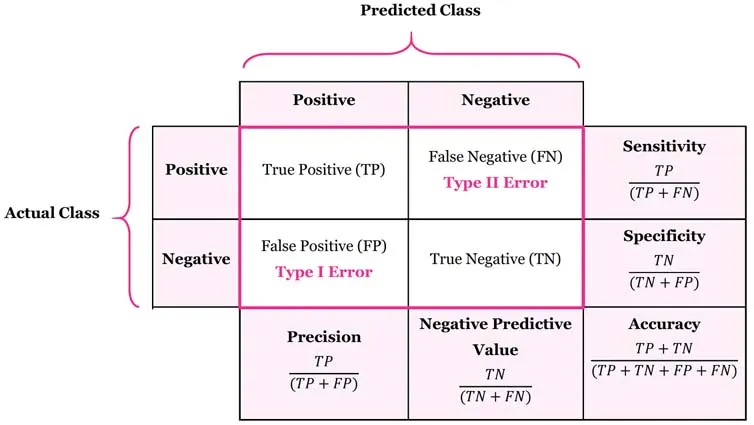

In [43]:
## 아래 패키지는 예시 1에서 이미 불러옴
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
# import numpy as np
# import matplotlib.pyplot as plt

# iris 데이터 셋
from sklearn import datasets
# 혼돈 행렬
from sklearn.metrics import confusion_matrix
# 분류 정확도
from sklearn.metrics import accuracy_score

### 원데이터 분석

In [44]:
# iris 데이터 셋 로딩
iris = datasets.load_iris()
# iris 입력 속성
print(iris.feature_names)
# iris 목표값
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [ ]:
# 입력데이터
data = iris.data
# 타겟데이터
target = iris.target

print(data)
print(target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

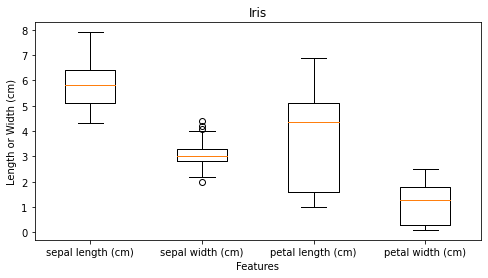

In [ ]:
# 그래프 가로, 세로 크기(inch)
plt.figure(figsize=(8,4))
# future 별 박스플롯
plt.boxplot([data[:,0],data[:,1],data[:,2],data[:,3]],
             labels=iris.feature_names)
plt.title('Iris')
plt.xlabel('Features')
plt.ylabel('Length or Width (cm)')
plt.show()

꽃받침의 길이와 너비 간의 분포를 종에 따라 색으로 구분하면 다음과 같다.

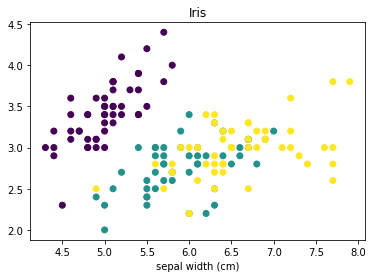

In [ ]:
# 데이터 분포
X = data[:,0] # sepal length
Y = data[:,1] # sepal width
plt.scatter(X,Y,c=target)
plt.title('Iris')
plt.xlabel(iris.feature_names[0])
plt.xlabel(iris.feature_names[1])
plt.show()

### 피쳐 스케일링

In [ ]:
# 데이터를 각 특성(1~4열)에 따라 표준화
scaler = StandardScaler()
data_std = scaler.fit_transform(data)
print(data_std)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

표준화 된 데이터로 다시 꽃받침의 길이와 너비 간의 분포를 종에 따라 색으로 구분하면 다음과 같다.

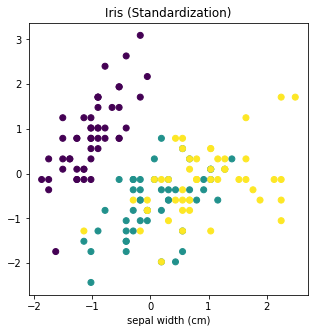

In [ ]:
# 그래프 가로, 세로 크기(inch)
plt.figure(figsize=(5,5))
X = data_std[:,0] # sepal length
Y = data_std[:,1] # sepal width
plt.scatter(X,Y,c=target)
plt.title('Iris (Standardization)')
plt.xlabel(iris.feature_names[0])
plt.xlabel(iris.feature_names[1])
plt.show()

### 군집화

군집수에 따른 TWSS를 계산하고 `elbow method`를 이용해 적당한 군집의수를 결정한다. 군집의 수가 3에서 4로 갈 때 기울기가 급변하므로 군집의구는 3개가 적당하다고 볼 수 있다.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

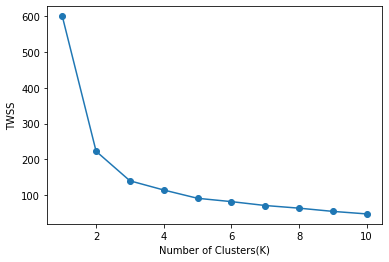

In [ ]:
# 군집 수 별 TWSS
TWSS = {}
# 군집 수가 1~10일때 TWSS를 계산
for k in range(1,11):
  model = KMeans(n_clusters=k) # 군집수가 k인 군집화 모델 생성
  model.fit(data_std) # 군집화
  TWSS[k] = model.inertia_ # TWSS저장

# 군집 수에 따른 TWSS그래프
plt.plot(TWSS.keys(),TWSS.values(), marker='o')
plt.xlabel('Number of Clusters(K)')
plt.ylabel('TWSS')
plt.show()

In [ ]:
# 군집화
K = 3
kmeans = KMeans(n_clusters=K)
kmeans.fit(data_std)
# 군집 중심
centers = kmeans.cluster_centers_
# 군집 라벨
labels = kmeans.labels_

print(centers)
print(labels)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 1.13597027  0.08842168  0.99615451  1.01752612]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [-0.05021989 -0.88337647  0.34773781  0.2815273 ]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2
 2 0 0 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


### 결과 분석

군집화된 라벨에 따라 색으로 구분하고, 각 군집 중심을 표시하면 아래 그래프와 같다

[[ 1.13597027  0.08842168  0.99615451  1.01752612]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [-0.05021989 -0.88337647  0.34773781  0.2815273 ]]


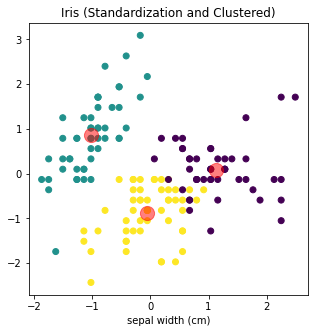

In [77]:
# 그래프 가로, 세로 크기(inch)
plt.figure(figsize=(5,5))
X = data_std[:,0]
Y = data_std[:,1]
plt.scatter(X,Y, c=labels) # 군집화 한 결과에 따라 표현
plt.title('Iris (Standardization and Clustered)')
plt.xlabel(iris.feature_names[0])
plt.xlabel(iris.feature_names[1])

# 군집 중심 표시
print(centers)
X = centers[:,0]
Y = centers[:,1]
plt.scatter(X,Y,c='red',s=200,alpha=0.5)
plt.show()

### 평가

target 데이터를 이용해 군집화한 결과와 실제 종을 비교해보자.  
target 데이터는 0,1,2값이 각각 'setosa', 'versicolor', 'versinica'을 의미하지만 군집화 된 결과의 분류 순서는 어떤 실행 할 때마다 달라질 수 있다.

In [ ]:
# 실제 종의 분류(target)
print(target)
# 군집화에 의해 분류된 라벨
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2
 2 0 0 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


혼돈행렬에서 행은 실제 종(target), 열은 군집화결과(labels)이다.  
```
[[ 0, 50,  0],
 [11,  0, 39],
 [36,  0, 14]]
```
위 행렬로 예를 들어보자.
1행을 보면 [0, 50, 0]이다. 즉 `target의 0`이 의미하는 'setosa'는 군집화 결과인 `labels의 1`에 모두 속한다.  
2행 'versicolor'는 `labels의 0`에 11개, `labels의 2`에 39개 속해있다.  

따라서 위 예시에서 군집화 한 결과 labels의 0,1,2는 각각 target의 2, 0, 1과 가장 비슷하다 할 수 있다.

labels의 0,1,2를 각각 2,0,1로 매핑하면 군집화 결과와 실제 종을 비교할 수 있다.

In [ ]:
# 혼돈행렬표: 실제 종 대비 군집화 결과
conf_mat = confusion_matrix(target, labels)
print(conf_mat)

[[ 0 50  0]
 [11  0 39]
 [36  0 14]]


In [ ]:
# 혼돈행렬을 이용해 labels값을 target값으로 매핑하는 리스트
labels_to_target = conf_mat.argmax(axis=0)

# labels의 값을 가장 비슷한 군집의 target값으로 매핑
for i in range(len(labels)):
  labels[i] = labels_to_target[labels[i]]

print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1
 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 2 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [ ]:
# 다시 혼돈행렬을 출력해 주대각원소를 확인해 정확를 간단히 확인
confusion_matrix(target, labels)

array([[50,  0,  0],
       [ 0, 39, 11],
       [ 0, 14, 36]])

#### 정확도 계산
정확도는 위 혼돈행렬의 주대각성분의 값의 합으로 확인 할 수 있다.  
위 혼돈 행렬의 주대각성분은 TF와 TN을 모두 의미하므로 아래와 같이 정확도(accurracy)를 계산 할 수 있다.
```
(TP + TN) / total

(주대각성분의 합) / (전체 성분의 합)
```


In [ ]:
# 주대각성분의 개채수 (TP + TN)
print(accuracy_score(target,labels,normalize=False))

# 정확도 ((TP + TN) / (전체))
print(accuracy_score(target,labels))

125
0.8333333333333334


### 추가 활동

꽃 받침의 너비와 길이외에도 다른 요소쌍으로도 군집화된 결과를 확인해 보자.

#### 패키지 설정

In [46]:
# K-평균 군집화 모듈  
from sklearn.cluster import KMeans 
# 표준화 모듈  
from sklearn.preprocessing import StandardScaler 
#  행렬연산 패키지  
import numpy as np 
# 데이터 시각화 패키지  
import matplotlib.pyplot as plt 

# iris 데이터 셋
from sklearn import datasets
# 혼돈 행렬
from sklearn.metrics import confusion_matrix
# 분류 정확도
from sklearn.metrics import accuracy_score

# 분석 요소 조합을 생성하기 위해 itertools 패키지 불러오기
from itertools import combinations 

#### 원데이터 분석

In [53]:
# iris 데이터 셋 로딩
iris = datasets.load_iris()
# iris 입력 속성
print(iris.feature_names)
# iris 목표값
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [73]:
# 입력데이터
data = iris.data
# 타겟데이터
target = iris.target

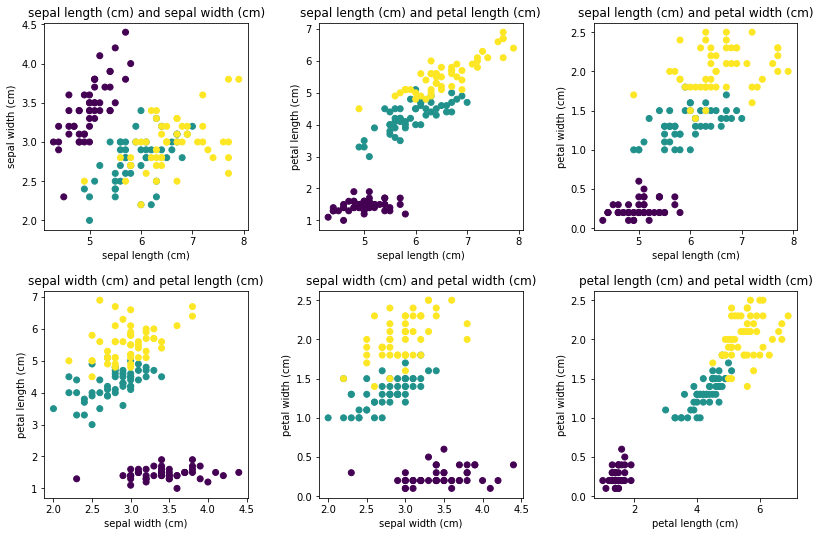

In [66]:
n_row = 2
n_col = 3
fig, ax = plt.subplots(n_row, n_col, figsize=(12,8)) # 2행 3열로 subplot 생성
fig.tight_layout(pad=4) # 패딩

# 가능한 모든 요소쌍 조합
comb = list(combinations(range(4),2)) 
n_comb = len(comb)

for i in range(n_comb):
  x, y = comb[i] # 속성값 x, y
  axis = ax[i//n_col, i%n_col] # subplot 위치
  x_label = iris.feature_names[x]
  y_label = iris.feature_names[y]
  axis.set_title(f'{x_label} and {y_label}') # sub_plot 제목
  axis.set_xlabel(x_label) # sub_plot 축의 x 레이블
  axis.set_ylabel(y_label) # sub_plot 축의 y 레이블

  x_data = data[:,x]
  y_data = data[:,y]
  axis.scatter(x_data, y_data, c=target)
plt.show()

#### 피처 스케일링

In [72]:
# 데이터를 각 특성(1~4열)에 따라 표준화
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

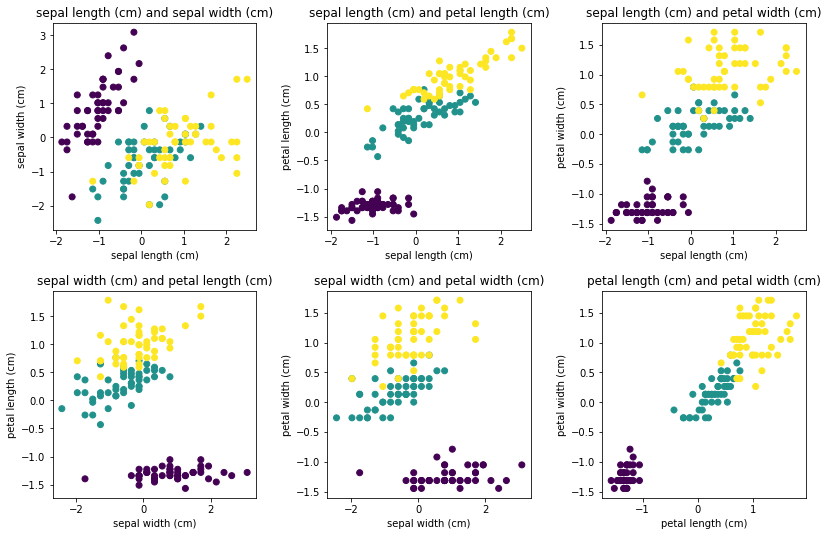

In [76]:
n_row = 2
n_col = 3
fig, ax = plt.subplots(n_row, n_col, figsize=(12,8)) # 2행 3열로 subplot 생성
fig.tight_layout(pad=4) # 패딩

# 가능한 모든 요소쌍 조합
comb = list(combinations(range(4),2)) 
n_comb = len(comb)

# 각 요소 쌍에 따라 표준화 한 데이터를 플로팅
for i in range(n_comb):
  x, y = comb[i] # 속성값 x, y
  axis = ax[i//n_col, i%n_col] # subplot 위치
  x_label = iris.feature_names[x]
  y_label = iris.feature_names[y]
  axis.set_title(f'{x_label} and {y_label}') # sub_plot 제목
  axis.set_xlabel(x_label) # sub_plot 축의 x 레이블
  axis.set_ylabel(y_label) # sub_plot 축의 y 레이블

  x_data = data_std[:,x] # 표준화 한 데이터
  y_data = data_std[:,y] # 표준화 한 데이터
  axis.scatter(x_data, y_data, c=target)
plt.show()

#### 군집화

위에서 사용했던 K인 3을 그대로 사용. 3개의 군집으로 군집화

In [75]:
# 군집화
K = 3
kmeans = KMeans(n_clusters=K)
kmeans.fit(data_std)
# 군집 중심
centers = kmeans.cluster_centers_
# 군집 라벨
labels = kmeans.labels_

print(centers)
print(labels)

[[ 1.13597027  0.08842168  0.99615451  1.01752612]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [-0.05021989 -0.88337647  0.34773781  0.2815273 ]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2
 2 0 0 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### 결과 분석

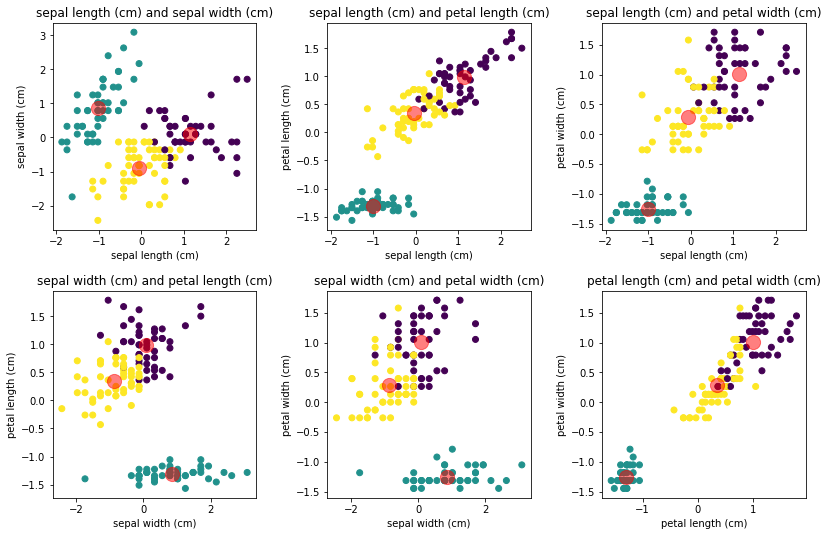

In [79]:
n_row = 2
n_col = 3
fig, ax = plt.subplots(n_row, n_col, figsize=(12,8)) # 2행 3열로 subplot 생성
fig.tight_layout(pad=4) # 패딩

# 가능한 모든 요소쌍 조합
comb = list(combinations(range(4),2)) 
n_comb = len(comb)

# 각 요소 쌍에 따라 군집화 한 결과를 플로팅
for i in range(n_comb):
  x, y = comb[i] # 속성값 x, y
  axis = ax[i//n_col, i%n_col] # subplot 위치
  x_label = iris.feature_names[x]
  y_label = iris.feature_names[y]
  axis.set_title(f'{x_label} and {y_label}') # sub_plot 제목
  axis.set_xlabel(x_label) # sub_plot 축의 x 레이블
  axis.set_ylabel(y_label) # sub_plot 축의 y 레이블

  x_data = data_std[:,x] # 표준화 한 데이터
  y_data = data_std[:,y] # 표준화 한 데이터
  axis.scatter(x_data, y_data, c=labels) # 군집화 한 결과로 색 구분

  x_center = centers[:,x]
  y_center = centers[:,y]
  axis.scatter(x_center, y_center, c='red', s=200, alpha=0.5)
plt.show()

#### 평가(정확도 계산)

In [81]:
# 혼돈행렬표: 실제 종 대비 군집화 결과
conf_mat = confusion_matrix(target, labels)
print(conf_mat)

[[ 0 50  0]
 [11  0 39]
 [36  0 14]]


In [83]:
# 혼돈행렬을 이용해 labels값을 target값으로 매핑하는 리스트
labels_to_target = conf_mat.argmax(axis=0)

# labels의 값을 가장 비슷한 군집의 target값으로 매핑
for i in range(len(labels)):
  labels[i] = labels_to_target[labels[i]]

print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1
 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 2 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [84]:
# 주대각성분의 개채수 (TP + TN)
print(accuracy_score(target,labels,normalize=False))

# 정확도 ((TP + TN) / (전체))
print(accuracy_score(target,labels))

125
0.8333333333333334
